## Import Libraries

In [1]:
import torch
import os
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from torch import nn, optim
import torch.nn.functional as F
from sklearn import preprocessing
import matplotlib.pyplot as plt

## Dataset Pre-processing

In [2]:
df = pd.read_excel('Concrete_Data.xls')

In [3]:
df.columns=['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer', 'CoarseAggregate',
          'FineAggregate', 'Age', 'ConcreteCompressiveStrength']

In [4]:
df.shape

(1030, 9)

In [5]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
df.isnull().sum()

Cement                         0
BlastFurnaceSlag               0
FlyAsh                         0
Water                          0
Superplasticizer               0
CoarseAggregate                0
FineAggregate                  0
Age                            0
ConcreteCompressiveStrength    0
dtype: int64

In [7]:
list(df.columns)

['Cement',
 'BlastFurnaceSlag',
 'FlyAsh',
 'Water',
 'Superplasticizer',
 'CoarseAggregate',
 'FineAggregate',
 'Age',
 'ConcreteCompressiveStrength']

## Train-Test Split

In [8]:
X = df[['Cement', 'BlastFurnaceSlag', 
        'FlyAsh', 'Water',
       'Superplasticizer', 'CoarseAggregate'
       , 'FineAggregate', 'Age']]
y = df[['ConcreteCompressiveStrength']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())

X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

## Feedforward Nueral Network: 8-16-1

In [11]:
class Net(nn.Module):

    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 16)
        self.fc2 = nn.Sigmoid()    
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


    


In [12]:
nnModel = Net(X_train.shape[1])

In [13]:
nnModel

Net(
  (fc1): Linear(in_features=8, out_features=16, bias=True)
  (fc2): Sigmoid()
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)

In [14]:
criterion = nn.MSELoss()

In [15]:
optimizer = optim.SGD(nnModel.parameters(), lr=0.001)

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [17]:
X_train = X_train.to(device)
y_train = y_train.to(device)

X_validate = X_test.to(device)
y_validate = y_test.to(device)

nnModel = nnModel.to(device)

criterion = criterion.to(device)

## Model Training

In [18]:
def model_train(t, decimal_places=3):
    return round(t.item(), decimal_places)

train_loss_values = []
test_loss_values = []

for epoch in range(1000):
    y_pred = nnModel(X_train)

    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)

    if epoch % 100 == 0:
        y_test_pred = nnModel(X_test)
        y_test_pred = torch.squeeze(y_test_pred)
        test_loss = criterion(y_test_pred, y_test)
        
        
        
        print(
f'''epoch {epoch}
Train set - loss: {(train_loss)}
Validation set - loss: {(test_loss)}
''')
        
    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()
    
    train_loss_values.append(train_loss)
    
    test_loss_values.append(test_loss)

    

epoch 0
Train set - loss: 1655.6943359375
Validation set - loss: 1537.360595703125

epoch 100
Train set - loss: 291.8406982421875
Validation set - loss: 265.76666259765625

epoch 200
Train set - loss: 284.697265625
Validation set - loss: 265.2994384765625

epoch 300
Train set - loss: 284.66064453125
Validation set - loss: 265.7406311035156

epoch 400
Train set - loss: 284.66046142578125
Validation set - loss: 265.7747497558594

epoch 500
Train set - loss: 284.6604309082031
Validation set - loss: 265.7771911621094

epoch 600
Train set - loss: 284.660400390625
Validation set - loss: 265.7771911621094

epoch 700
Train set - loss: 284.660400390625
Validation set - loss: 265.777099609375

epoch 800
Train set - loss: 284.660400390625
Validation set - loss: 265.7770690917969

epoch 900
Train set - loss: 284.660400390625
Validation set - loss: 265.77703857421875



## Plot: Train-Validation loss vs WeightUpdates

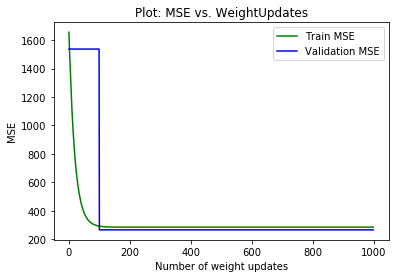

In [19]:
plt.plot(np.array(train_loss_values), 'g')
plt.plot(np.array(test_loss_values), 'b') 
plt.title('Plot: MSE vs. WeightUpdates') 
plt.ylabel('MSE') 
plt.xlabel('Number of weight updates') 
plt.legend(['Train MSE', 'Validation MSE'], loc='upper right') 
plt.show()